RFM Analysis is used to understand and segment customers based on their buying behaviour. RFM Stands for Recency, Frequency and Monetart Value, which are three key metrics that provide information about customer engagement, loyalty, and value to a business.

- Recency --> The date they made last purchase
- Frequency --> How often they make purchases
- Monetary Value --> The amount spent on purchases

In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

In [3]:
data = pd.read_csv('rfm_data.csv')

In [4]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


### Calculating RFM Values


In [6]:
from datetime import datetime

# Convert 'Purchase Date' from Object to Datetime
data['PurchaseDate']= pd.to_datetime(data['PurchaseDate'])

In [7]:
# Calculate Recency
data['Recency'] = (datetime.now() - data['PurchaseDate']).dt.days

In [8]:
# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns= {'OrderID': 'Frequency'}, inplace= True)

data = data.merge(frequency_data, on = 'CustomerID', how = 'left')

In [9]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,673,1
1,2188,2023-04-11,463.70,Product A,176819,London,673,1
2,4608,2023-04-11,80.28,Product A,340062,New York,673,1
3,2559,2023-04-11,221.29,Product A,239145,London,673,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,673,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,613,1
996,6669,2023-06-10,941.50,Product C,987025,New York,613,1
997,8836,2023-06-10,545.36,Product C,512842,London,613,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,613,1


In [10]:
# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns= {'TransactionAmount': 'MonetaryValue'}, inplace= True)

data = data.merge(monetary_data, on = 'CustomerID', how = 'left')

In [11]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,673,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,673,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,673,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,673,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,673,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,613,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,613,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,613,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,613,1,729.94


### Calculating RFM Scores

In [13]:
# Define scoring criteris for each RFM value
recency_scores = [5,4,3,2,1]
frequency_scores = [1,2,3,4,5]
monetary_scores = [1,2,3,4,5]

In [14]:
# Calculate RFM Scores
data['RecencyScore'] = pd.cut(data['Recency'], bins = 5, labels = recency_scores)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins = 5, labels = frequency_scores)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins = 5, labels= monetary_scores)

In [15]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,673,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,673,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,673,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,673,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,673,1,739.56,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,613,1,759.62,5,1,2
996,6669,2023-06-10,941.50,Product C,987025,New York,613,1,941.50,5,1,2
997,8836,2023-06-10,545.36,Product C,512842,London,613,1,545.36,5,1,2
998,1440,2023-06-10,729.94,Product B,559753,Paris,613,1,729.94,5,1,2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   category      
 10  FrequencyScore      1000 non-null   category      
 11  MonetaryScore       1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 74.0+ KB


In [35]:
# Convert RFM scores to numberic type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   RecencyScore        1000 non-null   int32         
 10  FrequencyScore      1000 non-null   int32         
 11  MonetaryScore       1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(2)
memory usage: 82.2+ KB


### RFM Value Segmentation


In [40]:
# Calculate RFM score by combining the individual score
data['RFM_score']= data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

In [42]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,673,1,943.31,1,1,2,4
1,2188,2023-04-11,463.70,Product A,176819,London,673,1,463.70,1,1,1,3
2,4608,2023-04-11,80.28,Product A,340062,New York,673,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,673,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,673,1,739.56,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,613,1,759.62,5,1,2,8
996,6669,2023-06-10,941.50,Product C,987025,New York,613,1,941.50,5,1,2,8
997,8836,2023-06-10,545.36,Product C,512842,London,613,1,545.36,5,1,2,8
998,1440,2023-06-10,729.94,Product B,559753,Paris,613,1,729.94,5,1,2,8


In [46]:
# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] =  pd.qcut(data['RFM_score'], q = 3, labels =segment_labels)

In [48]:
data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,673,1,943.31,1,1,2,4,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,673,1,463.70,1,1,1,3,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,673,1,80.28,1,1,1,3,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,673,1,221.29,1,1,1,3,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,673,1,739.56,1,1,2,4,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,613,1,759.62,5,1,2,8,High-Value
996,6669,2023-06-10,941.50,Product C,987025,New York,613,1,941.50,5,1,2,8,High-Value
997,8836,2023-06-10,545.36,Product C,512842,London,613,1,545.36,5,1,2,8,High-Value
998,1440,2023-06-10,729.94,Product B,559753,Paris,613,1,729.94,5,1,2,8,High-Value


In [60]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

In [62]:
segment_counts

,Value Segment,Count
0,Low-Value,435
1,Mid-Value,386
2,High-Value,179


In [66]:
pastel_colors = px.colors.qualitative.Pastel

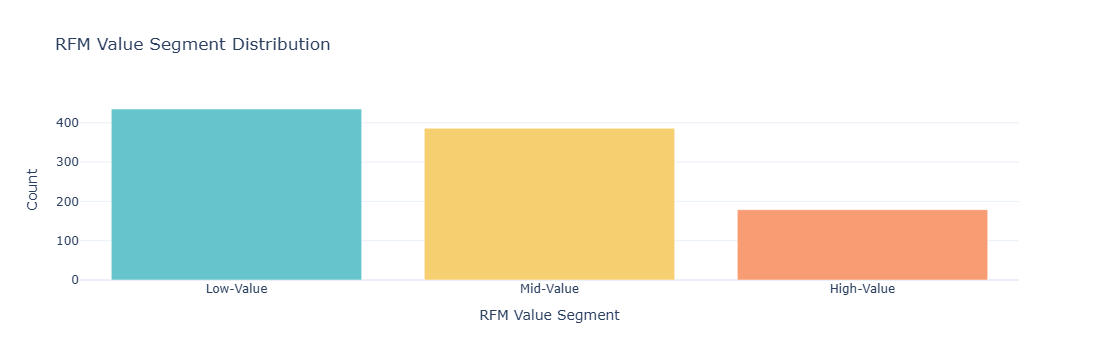

In [76]:
# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x = 'Value Segment', y = 'Count', color = 'Value Segment', color_discrete_sequence= pastel_colors,
      title = 'RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()

### RFM Customer Segments


In [83]:
# Create a new column for RFM Customer Segments
data['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
data.loc[data['RFM_score'] >= 9, 'RFM Customer Segments'] = 'Champions'
data.loc[(data['RFM_score'] >= 6) & (data['RFM_score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
data.loc[(data['RFM_score'] >= 5) & (data['RFM_score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
data.loc[(data['RFM_score'] >= 4) & (data['RFM_score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
data.loc[(data['RFM_score'] >= 3) & (data['RFM_score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(data[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


### RFM Analysis


In [98]:
segement_product_counts = data.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name = 'Count')

C:\Users\irt\AppData\Local\Temp\ipykernel_16648\3227009401.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [108]:
segement_product_counts = segement_product_counts.sort_values(by = 'Count', ascending= False)

C:\Users\irt\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\irt\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



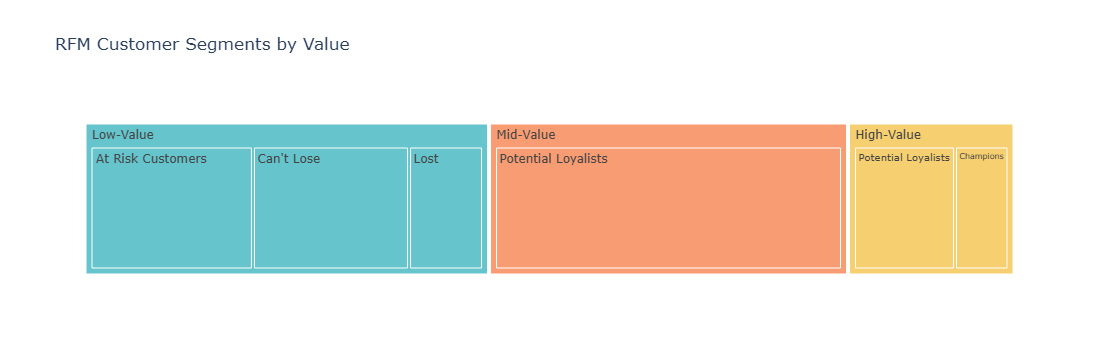

In [112]:
fig_treemap_segment_product = px.treemap(segement_product_counts,
          path = ['Value Segment', 'RFM Customer Segments'],
          values= 'Count',
           color= 'Value Segment', color_discrete_sequence= px.colors.qualitative.Pastel,
           title = 'RFM Customer Segments by Value'
          )

fig_treemap_segment_product.show()

In [118]:
champions_segment = data[data['RFM Customer Segments'] == 'Champions']

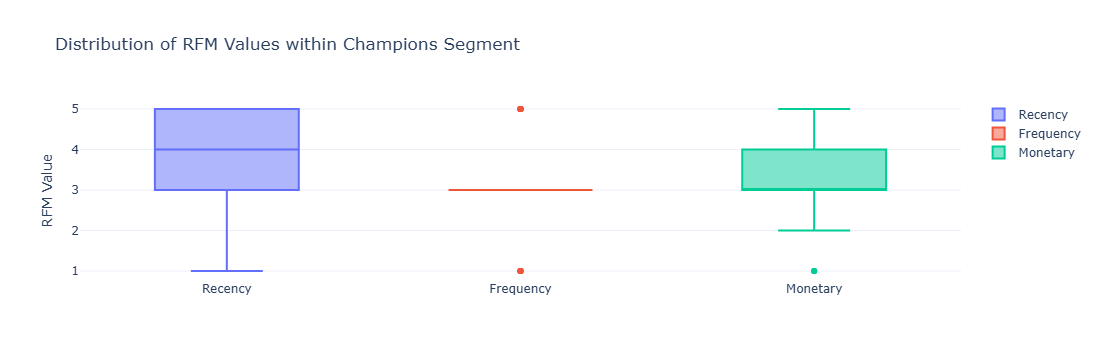

In [120]:
fig = go.Figure()
fig.add_trace(go.Box(y = champions_segment['RecencyScore'], name = 'Recency'))
fig.add_trace(go.Box(y = champions_segment['FrequencyScore'], name = 'Frequency'))
fig.add_trace(go.Box(y = champions_segment['MonetaryScore'], name = 'Monetary'))

fig.update_layout(title = 'Distribution of RFM Values within Champions Segment',
                 yaxis_title = 'RFM Value',
                 showlegend = True)

fig.show()



In [126]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

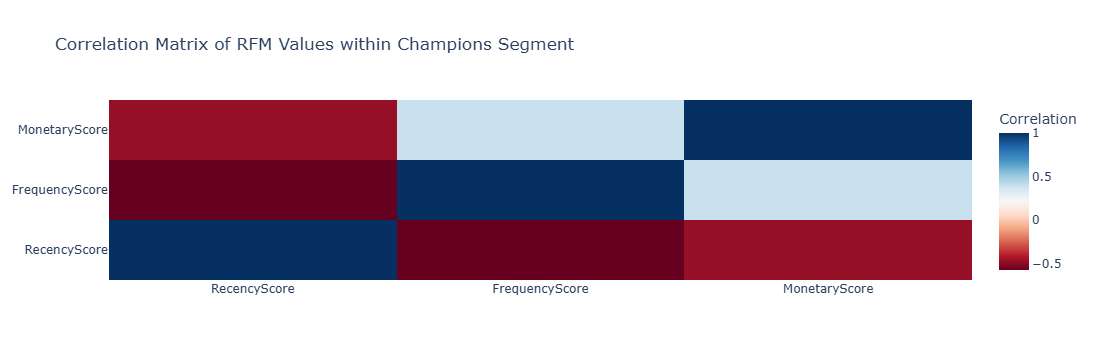

In [130]:
fig_heatmap = go.Figure(data = go.Heatmap(
            z = correlation_matrix.values,
            x = correlation_matrix.columns,
            y = correlation_matrix.columns,
    colorscale= 'RdBu',
    colorbar = dict(title = 'Correlation')
))

fig_heatmap.update_layout(title = 'Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()

In [132]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = data['RFM Customer Segments'].value_counts()




In [134]:
fig = go.Figure(data = [go.Bar(x = segment_counts.index, y = segment_counts.values,
                              marker= dict(color = pastel_colors))])



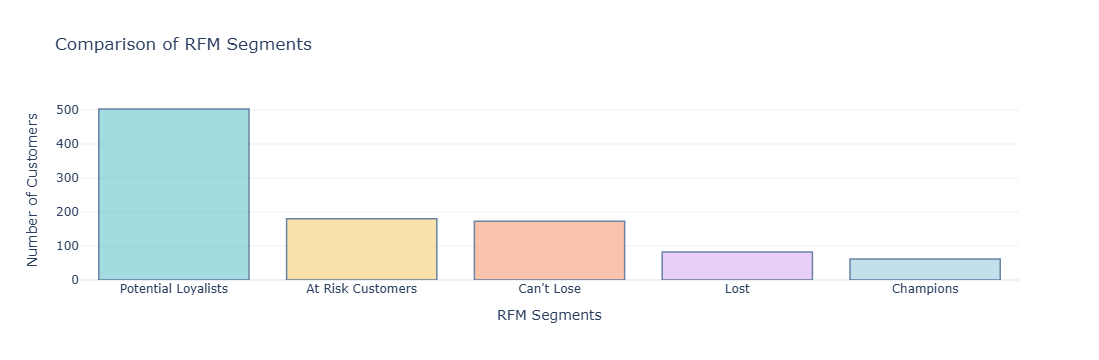

In [136]:
# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [154]:

segment_scores = data.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()


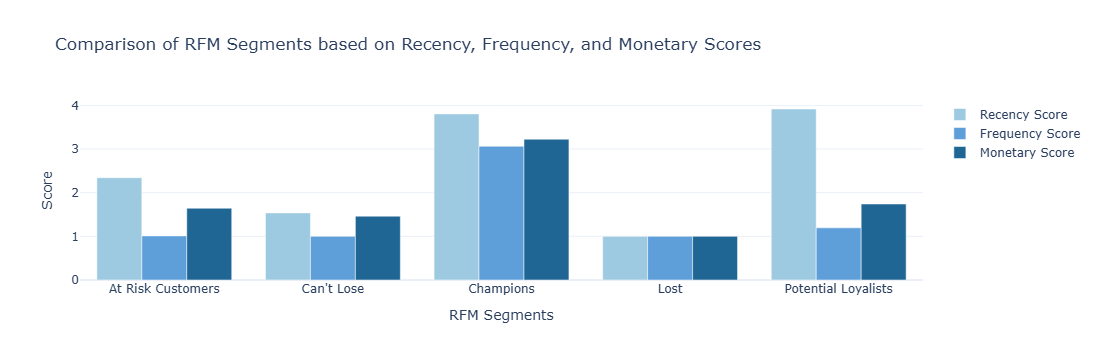

In [166]:
fig = go.Figure()

# Add bars for Recency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['RecencyScore'],
    name='Recency Score',
    marker_color='rgb(158,202,225)'
))

# Add bars for Frequency score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['FrequencyScore'],
    name='Frequency Score',
    marker_color='rgb(94,158,217)'
))

# Add bars for Monetary score
fig.add_trace(go.Bar(
    x=segment_scores['RFM Customer Segments'],
    y=segment_scores['MonetaryScore'],
    name='Monetary Score',
    marker_color='rgb(32,102,148)'
))

# Update the layout
fig.update_layout(
    title='Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores',
    xaxis_title='RFM Segments',
    yaxis_title='Score',
    barmode='group',
    showlegend=True
)

fig.show()

###### Summary
So, this is how to build an analytics dashboard using Python. An analytics dashboard is a data visualization tool that aggregates, displays, and analyzes key performance indicators (KPIs), metrics, and other key data points related to a business, department, or specific process.